# Prerequisites

## Install Library

In [1]:
# for python 3.12.3
%pip install -r requirements.txt

  Using cached jupyterlab-3.6.8-py3-none-any.whl.metadata (12 kB)
  Using cached jupyterlab_server-2.27.3-py3-none-any.whl.metadata (5.9 kB)
  Using cached jupyter_ydoc-0.2.5-py3-none-any.whl.metadata (2.2 kB)
  Using cached jupyter_server_ydoc-0.8.0-py3-none-any.whl.metadata (5.3 kB)
  Using cached jupyter_server_fileid-0.9.3-py3-none-any.whl.metadata (4.7 kB)
  Using cached ypy_websocket-0.8.4-py3-none-any.whl.metadata (2.5 kB)
  Using cached y_py-0.6.2.tar.gz (53 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [23 lines of output]
      Checking for Rust toolchain....
      Rust not found, installing into a temporary directory
      Python reports platform: win-amd64
      Computed rustc target triple: x86_64-pc-windows-msvc
      Installation directory: C:\Users\user\AppData\Local\puccinialin\puccinialin\Cache
      Rustup already downloaded
      Installing rust to C:\Users\user\AppData\Local\puccinialin\puccinialin\Cache\rustup
      warn: It looks like you have an existing rustup settings file at:
      warn: C:\Users\user\.rustup\settings.toml
      warn: Rustup will install the default toolchain as specified in the settings file,
      warn: instead of the one inferred from the default host triple.
      warn: installing msvc toolchain without its prerequisites
      info: profile set to 'minimal'
      info: default host triple is x86_64-pc-windows-msvc
   

In [2]:
pip install scikit-optimize

Note: you may need to restart the kernel to use updated packages.


## Import Library

In [125]:
## Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from tqdm import tqdm
from skopt import BayesSearchCV
from scipy.stats import skew, normaltest, zscore
from geopy.distance import geodesic
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import ParameterGrid, ParameterSampler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, make_scorer, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Read Data

In [ ]:
raw_train = pd.read_csv('D:/NIDA/9000_IS/dataset/fraudTrain.csv')
# raw_test = pd.read_csv('D:/NIDA/9000_IS/dataset/fraudTest.csv')

## Data Understanding

In [ ]:
df = raw_train.copy()
# df = raw_test.copy()

In [219]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [221]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [222]:
## Check null data
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [223]:
## Check duplicated data
df.duplicated().sum()

0

In [224]:
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [225]:
df.shape

(555719, 23)

In [226]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

## Data Cleansing

In [227]:
df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])
df["dob"] = pd.to_datetime(df["dob"])
display(df.head())

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [228]:
df['age'] = dt.date.today().year - pd.to_datetime(df['dob']).dt.year

## Data Enrichment / Feature Engineering

### Add Date/Time Features

In [229]:
## Add Date/Time Features
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['hour'] = pd.to_datetime(df['trans_date_trans_time']).dt.hour
df['day'] = pd.to_datetime(df['trans_date_trans_time']).dt.day
df['month'] = pd.to_datetime(df['trans_date_trans_time']).dt.month
df['year'] = pd.to_datetime(df['trans_date_trans_time']).dt.year
df['is_weekend'] = (df['trans_date_trans_time'].dt.weekday >= 5).astype(int)
df['is_weekday'] = (df['trans_date_trans_time'].dt.weekday < 5).astype(int)

In [230]:
# Sort the data by cc_num and transaction date
df = df.sort_values(by=['cc_num', 'trans_date_trans_time'])

# Calculate the time difference as a timedelta
df['time_diff'] = df.groupby('cc_num')['trans_date_trans_time'].diff()

# Extract days, hours, and minutes from the timedelta
df['diff_days'] = df['time_diff'].dt.days
df['diff_hours'] = df['time_diff'].dt.seconds // 3600
df['diff_minutes'] = (df['time_diff'].dt.seconds % 3600) // 60
df['diff_seconds'] = df['time_diff'].dt.seconds

# Fill NaN values in the new columns with 0
df['time_diff'] = df['time_diff'].dt.total_seconds().fillna(0).astype(int)
df['diff_days'] = df['diff_days'].fillna(0).astype(int)
df['diff_hours'] = df['diff_hours'].fillna(0).astype(int)
df['diff_minutes'] = df['diff_minutes'].fillna(0).astype(int)
df['diff_seconds'] = df['diff_seconds'].fillna(0).astype(int)

In [231]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,day,month,year,is_weekend,is_weekday,time_diff,diff_days,diff_hours,diff_minutes,diff_seconds
157,157,2020-06-21 13:05:42,60416207185,fraud_Kutch-Ferry,home,124.66,Mary,Diaz,F,9886 Anita Drive,...,21,6,2020,1,0,0,0,0,0,0
741,741,2020-06-21 16:25:36,60416207185,fraud_Halvorson Group,misc_pos,78.52,Mary,Diaz,F,9886 Anita Drive,...,21,6,2020,1,0,11994,0,3,19,11994
3047,3047,2020-06-22 07:58:33,60416207185,fraud_Conroy-Cruickshank,gas_transport,65.25,Mary,Diaz,F,9886 Anita Drive,...,22,6,2020,0,1,55977,0,15,32,55977
4351,4351,2020-06-22 15:32:31,60416207185,fraud_Larkin Ltd,kids_pets,87.74,Mary,Diaz,F,9886 Anita Drive,...,22,6,2020,0,1,27238,0,7,33,27238
7695,7695,2020-06-23 12:28:54,60416207185,fraud_Leffler-Goldner,personal_care,148.02,Mary,Diaz,F,9886 Anita Drive,...,23,6,2020,0,1,75383,0,20,56,75383


### Encoding Data

In [232]:
## Check unique value for category
print(df['category'].unique())
print(df['city'].unique())
print(df['state'].unique())

['home' 'misc_pos' 'gas_transport' 'kids_pets' 'personal_care'
 'shopping_net' 'travel' 'grocery_pos' 'entertainment' 'shopping_pos'
 'grocery_net' 'misc_net' 'food_dining' 'health_fitness']
['Fort Washakie' 'North Augusta' 'Amorita' 'Burns Flat' 'Jackson' 'Haynes'
 'Dallas' 'Greenview' 'Dexter' 'West Decatur' 'Meadville' 'Gadsden'
 'Garrattsville' 'Kissee Mills' 'Marion' 'Saint James City' 'Grifton'
 'San Antonio' 'Liberty Mills' 'Washington' 'Jordan Valley' 'Houston'
 'Christine' 'Allentown' 'Mc Clellandtown' 'Elberta' 'Louisville'
 'Jaffrey' 'Wilmette' 'Spring Church' 'Montrose' 'Lahoma' 'Desdemona'
 'Cochranton' 'Waupaca' 'Coleharbor' 'Kirkwood' 'Republic' 'Orient'
 'Thomas' 'Cass' 'May' 'Wetmore' 'Cascade Locks' 'Hazel' 'Helm'
 'Hannawa Falls' 'Olmsted' 'Leetsdale' 'Broomfield' 'Curlew' 'Armonk'
 'Beaver Falls' 'Sprague' 'Ogdensburg' 'Napa' 'Scotts Mills' 'Eagarville'
 'Santa Monica' 'Altair' 'Parker Dam' 'West Palm Beach' 'Cape Coral'
 'Elk Rapids' 'Whigham' 'Skytop' 'Center Poin

In [233]:
## One-Hot Encoding
df = pd.get_dummies(df, columns=['category'])

In [234]:
## Encoder data
label_cols = ['merchant', 'gender', 'state', 'city', 'job']
label_encoders = {}
for col in label_cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    label_encoders[col] = encoder

In [235]:
bool_columns = df.select_dtypes(include=['bool']).columns
df[bool_columns] = df[bool_columns].astype(int)

In [236]:
## Add distance feature
# Assuming 'lat' and 'long' are the latitude and longitude of the user location
# and 'merch_lat' and 'merch_long' are the latitude and longitude of the merchant location
df['distance'] = df.apply(lambda row: geodesic((row['lat'], row['long']), (row['merch_lat'], row['merch_long'])).kilometers, axis=1)

In [237]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'age', 'hour', 'day', 'month', 'year',
       'is_weekend', 'is_weekday', 'time_diff', 'diff_days', 'diff_hours',
       'diff_minutes', 'diff_seconds', 'category_entertainment',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'distance'],
      dtype='object')

In [238]:
display(df.head())

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,amt,first,last,gender,street,city,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,distance
157,157,2020-06-21 13:05:42,60416207185,362,124.66,Mary,Diaz,0,9886 Anita Drive,258,...,0,1,0,0,0,0,0,0,0,30.533617
741,741,2020-06-21 16:25:36,60416207185,225,78.52,Mary,Diaz,0,9886 Anita Drive,258,...,0,0,0,0,1,0,0,0,0,91.864216
3047,3047,2020-06-22 07:58:33,60416207185,103,65.25,Mary,Diaz,0,9886 Anita Drive,258,...,0,0,0,0,0,0,0,0,0,121.877934
4351,4351,2020-06-22 15:32:31,60416207185,373,87.74,Mary,Diaz,0,9886 Anita Drive,258,...,0,0,1,0,0,0,0,0,0,65.393092
7695,7695,2020-06-23 12:28:54,60416207185,382,148.02,Mary,Diaz,0,9886 Anita Drive,258,...,0,0,0,0,0,1,0,0,0,38.394780


In [239]:
df.dtypes

Unnamed: 0                          int64
trans_date_trans_time      datetime64[ns]
cc_num                              int64
merchant                            int32
amt                               float64
first                              object
last                               object
gender                              int32
street                             object
city                                int32
state                               int32
zip                                 int64
lat                               float64
long                              float64
city_pop                            int64
job                                 int32
dob                        datetime64[ns]
trans_num                          object
unix_time                           int64
merch_lat                         float64
merch_long                        float64
is_fraud                            int64
age                                 int32
hour                              

In [240]:
df = df.sort_values(by=['trans_date_trans_time'], ascending=True)

In [241]:
df.isnull().sum()

Unnamed: 0                 0
trans_date_trans_time      0
cc_num                     0
merchant                   0
amt                        0
first                      0
last                       0
gender                     0
street                     0
city                       0
state                      0
zip                        0
lat                        0
long                       0
city_pop                   0
job                        0
dob                        0
trans_num                  0
unix_time                  0
merch_lat                  0
merch_long                 0
is_fraud                   0
age                        0
hour                       0
day                        0
month                      0
year                       0
is_weekend                 0
is_weekday                 0
time_diff                  0
diff_days                  0
diff_hours                 0
diff_minutes               0
diff_seconds               0
category_enter

In [242]:
display(df.head(10))

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,amt,first,last,gender,street,city,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,distance
0,0,2020-06-21 12:14:25,2291163933867244,319,2.86,Jeff,Elliott,1,351 Darlene Green,157,...,0,0,0,0,0,1,0,0,0,24.613746
1,1,2020-06-21 12:14:33,3573030041201292,591,29.84,Joanne,Williams,0,3638 Marsh Union,16,...,0,0,0,0,0,1,0,0,0,104.834043
2,2,2020-06-21 12:14:53,3598215285024754,611,41.28,Ashley,Lopez,0,9333 Valentine Point,61,...,1,0,0,0,0,0,0,0,0,59.204796
3,3,2020-06-21 12:15:15,3591919803438423,222,60.05,Brian,Williams,1,32941 Krystal Mill Apt. 552,764,...,0,0,0,0,1,0,0,0,0,27.615117
4,4,2020-06-21 12:15:17,3526826139003047,292,3.19,Nathan,Massey,1,5783 Evan Roads Apt. 465,247,...,0,0,0,0,0,0,0,0,1,104.423175
5,5,2020-06-21 12:15:37,30407675418785,126,19.55,Danielle,Evans,0,76752 David Lodge Apt. 064,90,...,0,0,1,0,0,0,0,0,0,86.045959
6,6,2020-06-21 12:15:44,213180742685905,526,133.93,Kayla,Sutton,0,010 Weaver Land,117,...,1,0,0,0,0,0,0,0,0,134.408462
7,7,2020-06-21 12:15:50,3589289942931264,500,10.37,Paula,Estrada,0,350 Stacy Glens,725,...,0,0,0,0,0,1,0,0,0,82.907939
8,8,2020-06-21 12:16:10,3596357274378601,201,4.37,David,Everett,1,4138 David Fall,503,...,0,0,0,0,0,0,0,1,0,61.401541
9,9,2020-06-21 12:16:11,3546897637165774,315,66.54,Kayla,Obrien,0,7921 Robert Port Suite 343,624,...,0,0,0,0,0,0,0,0,0,44.193728


## Save Cleaned Data

In [ ]:
df.to_csv('D:/NIDA/9000_IS/fraudTrain_cleaned.csv', index=False)
# df.to_csv('D:/NIDA/9000_IS/fraudTest_cleaned.csv', index=False)

## EDA

### Categorical Features

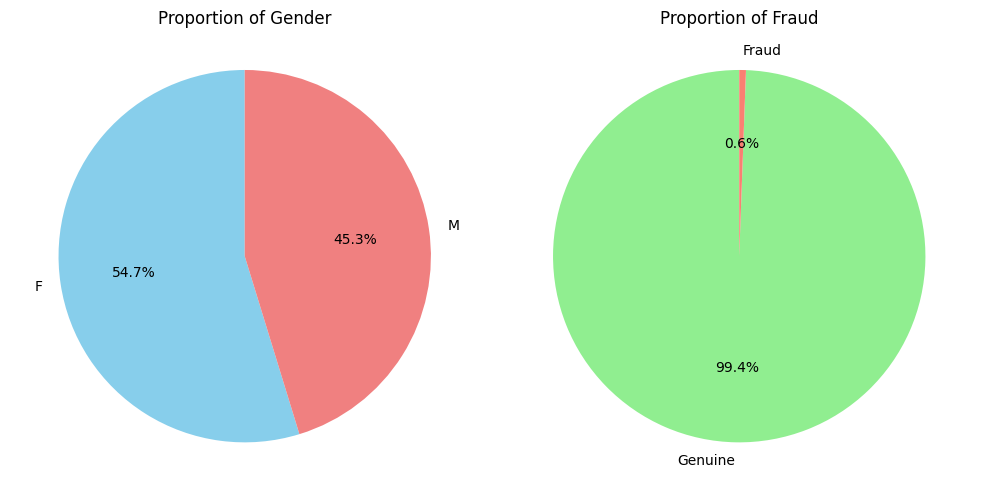

In [35]:
# Calculate proportions
gender_counts = raw_train['gender'].value_counts()
fraud_counts = raw_train['is_fraud'].value_counts()

# Set up the subplot figure
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Gender pie chart
ax[0].pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightcoral']
)
ax[0].set_title('Proportion of Gender')
ax[0].axis('equal')  # Equal aspect ratio for circle

# Fraud pie chart
ax[1].pie(
    fraud_counts,
    labels=["Genuine", "Fraud"],
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightgreen', 'salmon']
)
ax[1].set_title('Proportion of Fraud')
ax[1].axis('equal')

plt.tight_layout()
plt.show()


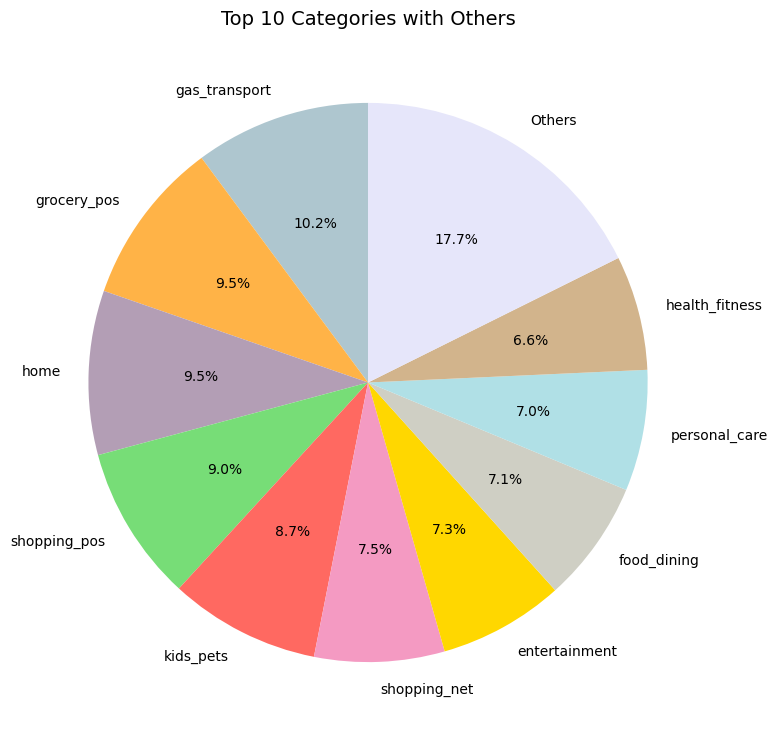

In [36]:
# Get category value counts
category_counts = raw_train['category'].value_counts()

# Separate top 10 and group the rest as 'Others'
top_10 = category_counts[:10]
others = category_counts[10:].sum()
category_combined = top_10.copy()
category_combined['Others'] = others

# Define a pastel color palette
pastel_colors = [
    '#AEC6CF', '#FFB347', '#B39EB5', '#77DD77', '#FF6961',
    '#F49AC2', '#FFD700', '#CFCFC4', '#B0E0E6', '#D2B48C', '#E6E6FA'
]

# Plot the pie chart
plt.figure(figsize=(8, 8))
category_combined.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=pastel_colors[:len(category_combined)]
)
plt.title('Top 10 Categories with Others', fontsize=14)
plt.ylabel('')  # Hide y-axis label
plt.tight_layout()
plt.show()

In [37]:
# Calculate fraud density
train_state_fraud = raw_train[raw_train['is_fraud'] == 1].groupby('state').size().reset_index(name='fraud_count')
train_state_fraud['is_fraud'] = train_state_fraud['fraud_count'] / train_state_fraud['fraud_count'].sum()

# Calculate Genuine density
train_state_non_fraud = raw_train[raw_train['is_fraud'] == 0].groupby('state').size().reset_index(name='non_fraud_count')
train_state_non_fraud.set_index('state', inplace=True)
train_state_non_fraud['non_fraud_count'] = train_state_non_fraud['non_fraud_count'] / train_state_non_fraud['non_fraud_count'].sum()

# Get max density for common scale
zmax = max(train_state_fraud['is_fraud'].max(), train_state_non_fraud['non_fraud_count'].max())

# Create subplots
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=['Fraud Transactions by State', 'Genuine Transactions by State'],
    specs=[[{"type": "choropleth"}, {"type": "choropleth"}]]
)

# Fraud map
fig.add_trace(go.Choropleth(
    locations=train_state_fraud['state'],
    z=train_state_fraud['is_fraud'],
    locationmode='USA-states',
    colorscale='Reds',
    zmin=0, zmax=zmax,
    colorbar=dict(title="Fraud Density", x=0.45)
), row=1, col=1)

# Genuine map
fig.add_trace(go.Choropleth(
    locations=train_state_non_fraud.index,
    z=train_state_non_fraud['non_fraud_count'],
    locationmode='USA-states',
    colorscale='Blues',
    zmin=0, zmax=zmax,
    colorbar=dict(title="Genuine Density", x=1.0)
), row=1, col=2)

# Set both maps to USA scope
fig.update_geos(scope='usa', row=1, col=1)
fig.update_geos(scope='usa', row=1, col=2)

# Layout
fig.update_layout(
    title_text="Fraud vs Genuine Transaction Density by State",
    title_x=0.5,
    title_xanchor='center',
    template='plotly_white'  # Use a clean, pastel-like template
)

fig.show()

### Numerical Features

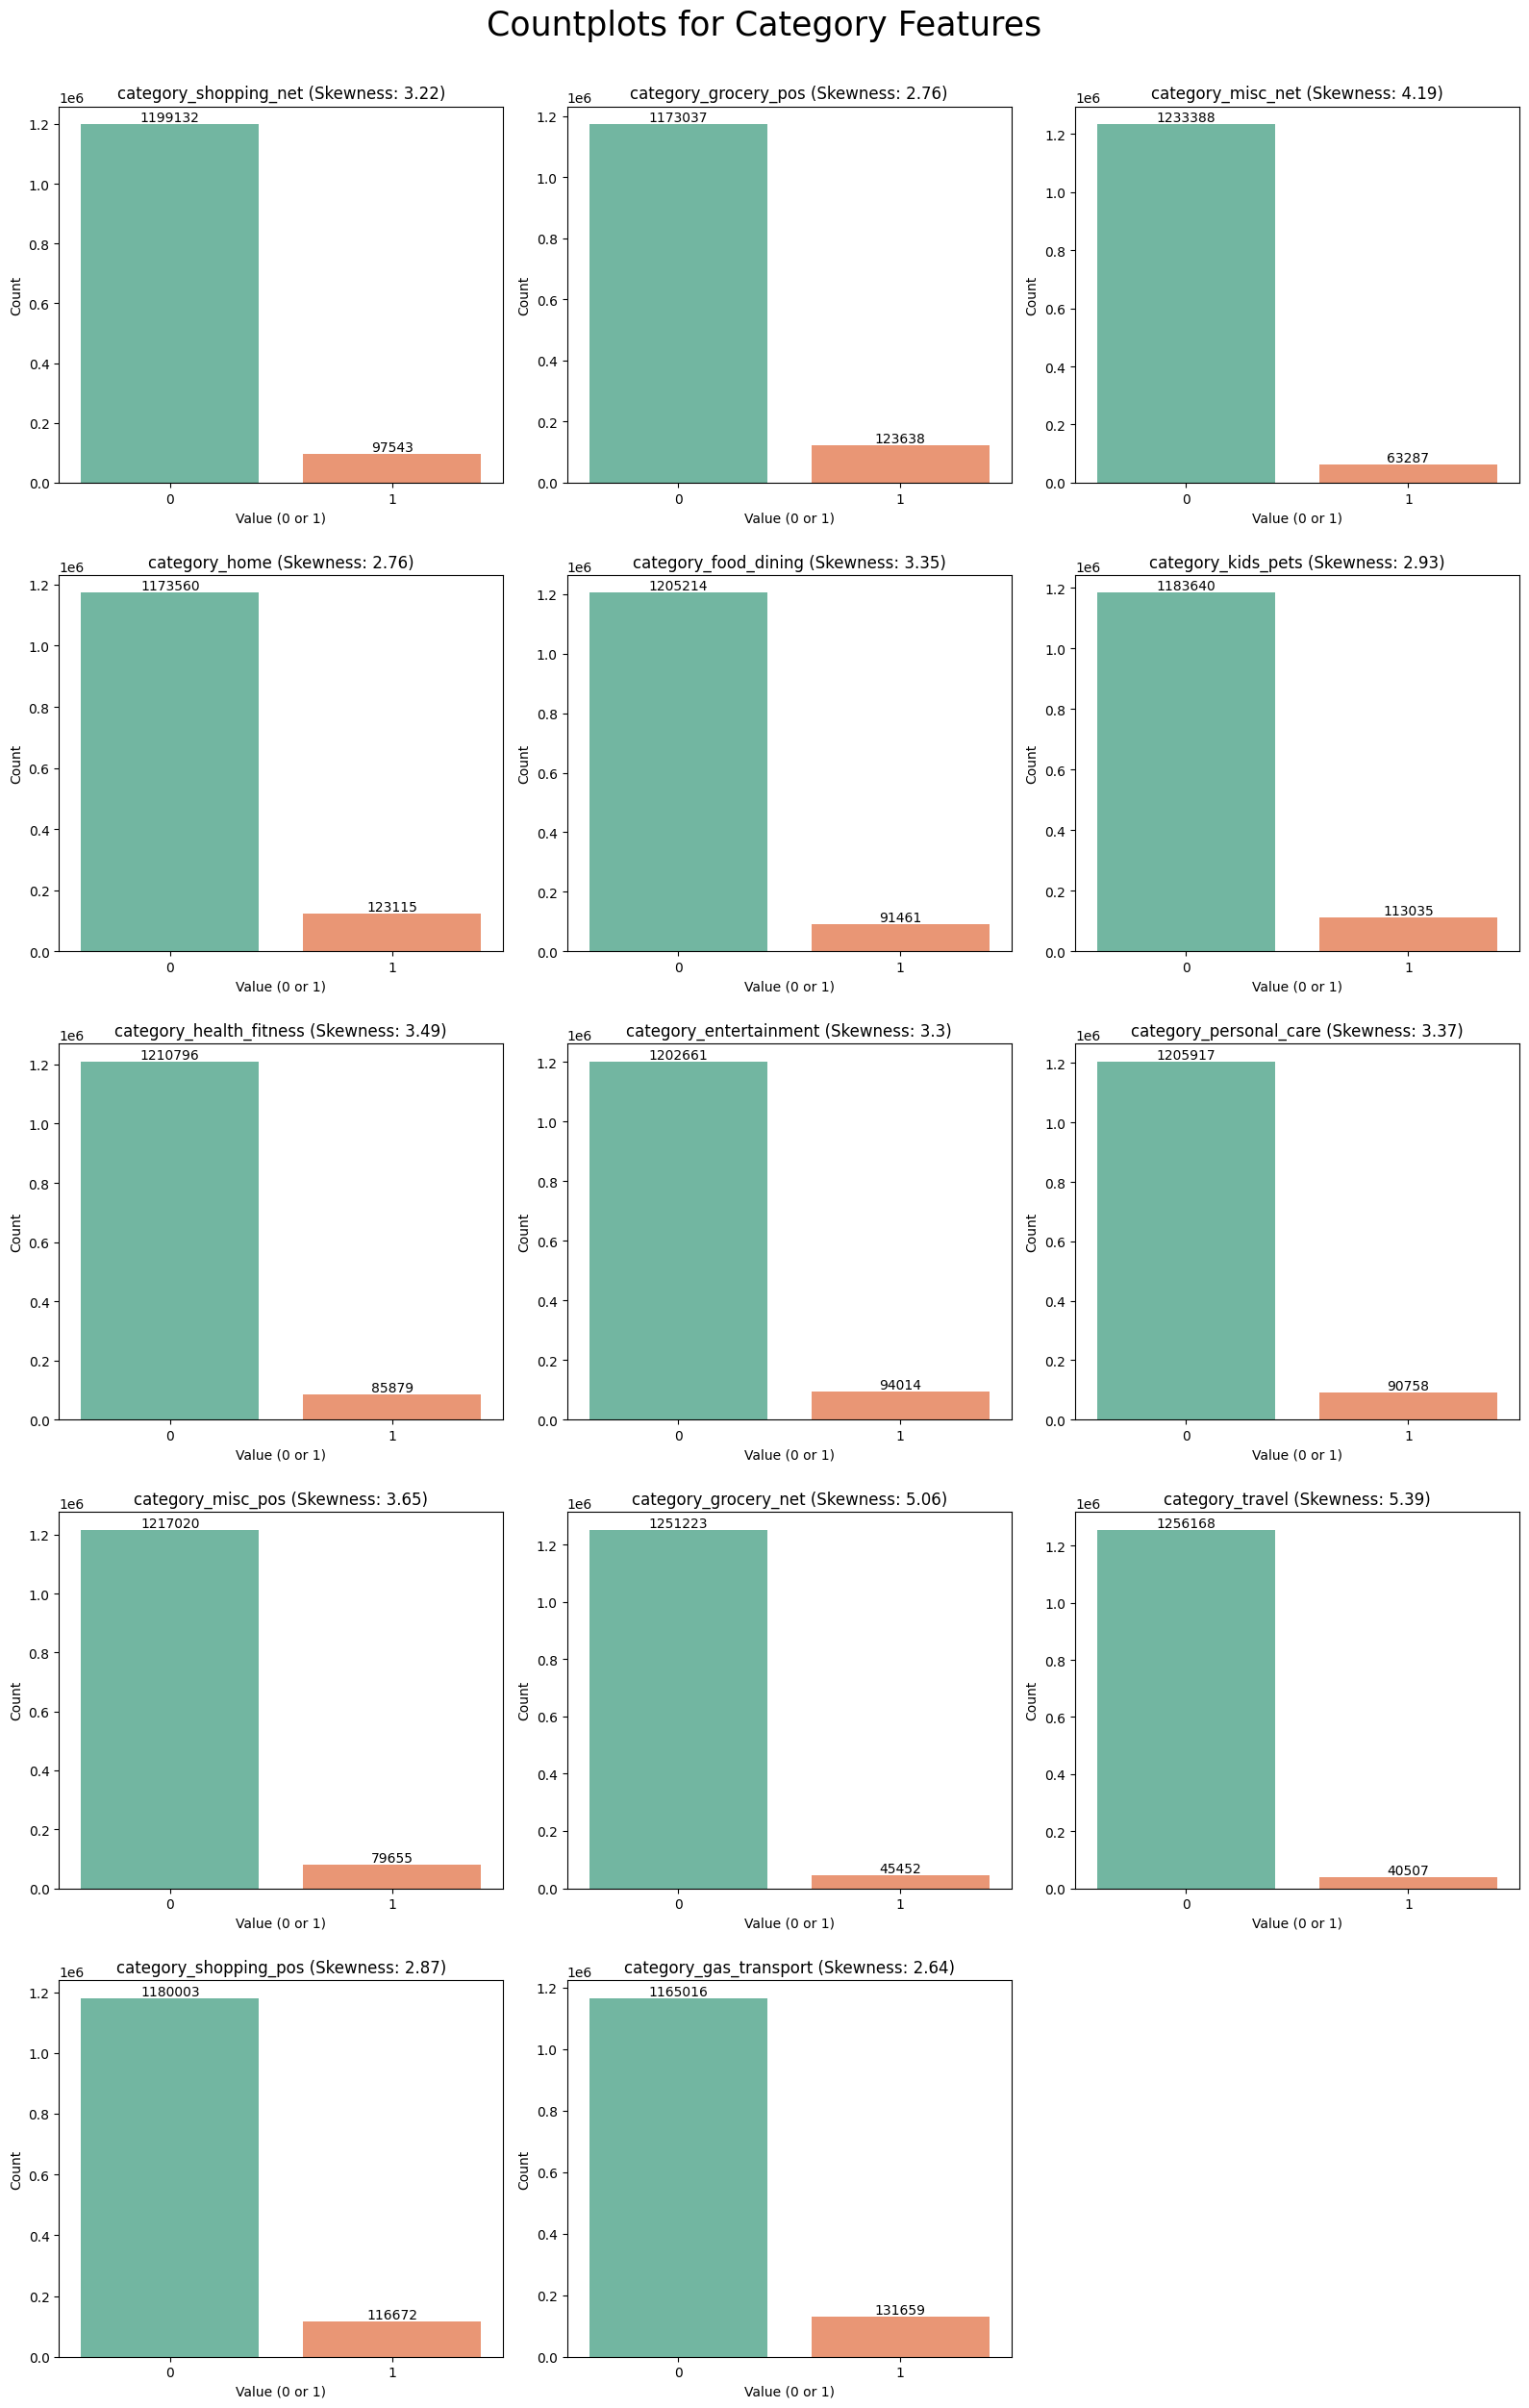

In [38]:
## Plot countplots for category features (dummies)
def countplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, figsize=(16, 25))
    fig.suptitle(suptitle, y=1, size=25)
    axs = axs.flatten()

    # Loop through each column and plot
    for i, data in enumerate(columns_list):
        if i < len(axs):  # Check to avoid index error
            # Plotting countplot for categorical features
            sns.countplot(x=dataset[data], ax=axs[i], palette="Set2")
            axs[i].set_title(f'{data} (Skewness: {round(dataset[data].skew(axis=0, skipna=True), 2)})')
            
            # Add value labels on top of each bar
            for p in axs[i].patches:
                axs[i].annotate(f'{int(p.get_height())}', 
                               (p.get_x() + p.get_width() / 2., p.get_height()), 
                               ha='center', va='bottom')
            
            # Set labels
            axs[i].set_xlabel('Value (0 or 1)')
            axs[i].set_ylabel('Count')

    # Hide any unused subplots
    for j in range(i+1, len(axs)):
        axs[j].set_visible(False)
    
    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

# List of category columns
category_columns = [
    'category_shopping_net', 'category_grocery_pos', 'category_misc_net',
    'category_home', 'category_food_dining', 'category_kids_pets',
    'category_health_fitness', 'category_entertainment', 'category_personal_care',
    'category_misc_pos', 'category_grocery_net', 'category_travel',
    'category_shopping_pos', 'category_gas_transport'
]

# Apply the countplot function to the dataset
countplots_custom(dataset=df, columns_list=category_columns, rows=5, cols=3, suptitle='Countplots for Category Features')

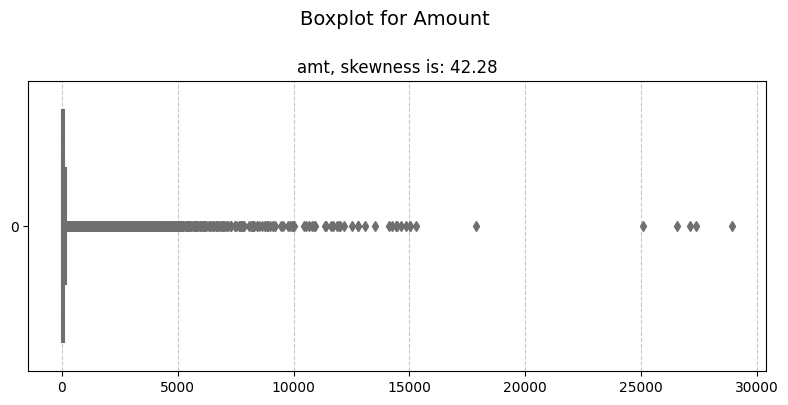

Min: 1.00
25th Percentile: 9.65
Median: 47.52
75th Percentile: 83.14
Max: 28948.90
Mean: 70.35
Standard Deviation: 160.32


In [39]:
# checking boxplots for amt feature
def boxplot_for_amt(dataset, feature, title, color='skyblue'):
    # Creating a figure with one subplot
    fig, ax = plt.subplots(figsize=(8, 4))
    fig.suptitle(title, y=1, size=14)

    # Plotting horizontal boxplot for the amt feature
    sns.boxplot(data=dataset[feature], orient='h', ax=ax, color=color)

    # Adding title with skewness information
    skewness = round(dataset[feature].skew(axis=0, skipna=True), 2)
    ax.set_title(f'{feature}, skewness is: {skewness}')

    # Adding grid lines for better readability
    ax.grid(axis='x', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

    # Print some additional statistics
    print(f"Min: {dataset[feature].min():.2f}")
    print(f"25th Percentile: {dataset[feature].quantile(0.25):.2f}")
    print(f"Median: {dataset[feature].median():.2f}")
    print(f"75th Percentile: {dataset[feature].quantile(0.75):.2f}")
    print(f"Max: {dataset[feature].max():.2f}")
    print(f"Mean: {dataset[feature].mean():.2f}")
    print(f"Standard Deviation: {dataset[feature].std():.2f}")

# Apply the function to the amt feature
boxplot_for_amt(dataset=df, feature='amt', title='Boxplot for Amount')

In [40]:
def boxplot_by_group(dataset, feature, group_by, title, palette=None, log_scale=False):
    fig, ax = plt.subplots(figsize=(10, 5))
    fig.suptitle(title, y=1, size=14)

    # Plotting vertical grouped boxplot
    sns.boxplot(x=group_by, y=feature, data=dataset, palette=palette, ax=ax)

    # Log scale if needed
    if log_scale:
        ax.set_yscale('log')

    # Skewness for the whole feature
    skewness = round(dataset[feature].skew(axis=0, skipna=True), 2)
    ax.set_title(f'{feature} grouped by {group_by}, skewness is: {skewness}', fontsize=12)

    # Axis labels
    ax.set_xlabel(group_by, fontsize=12)
    ax.set_ylabel(feature, fontsize=12)

    # Grid
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

    # Print statistics by group
    print(f"\n📊 Statistics for '{feature}' by '{group_by}':\n")
    grouped = dataset.groupby(group_by)[feature]
    for name, group in grouped:
        print(f"🔹 Group: {name}")
        print(f"  Count: {group.count()}")
        print(f"  Min: {group.min():.2f}")
        print(f"  25th Percentile: {group.quantile(0.25):.2f}")
        print(f"  Median: {group.median():.2f}")
        print(f"  75th Percentile: {group.quantile(0.75):.2f}")
        print(f"  Max: {group.max():.2f}")
        print(f"  Mean: {group.mean():.2f}")
        print(f"  Mode: {group.mode()[0]:.2f}")
        print(f"  Std Dev: {group.std():.2f}\n")

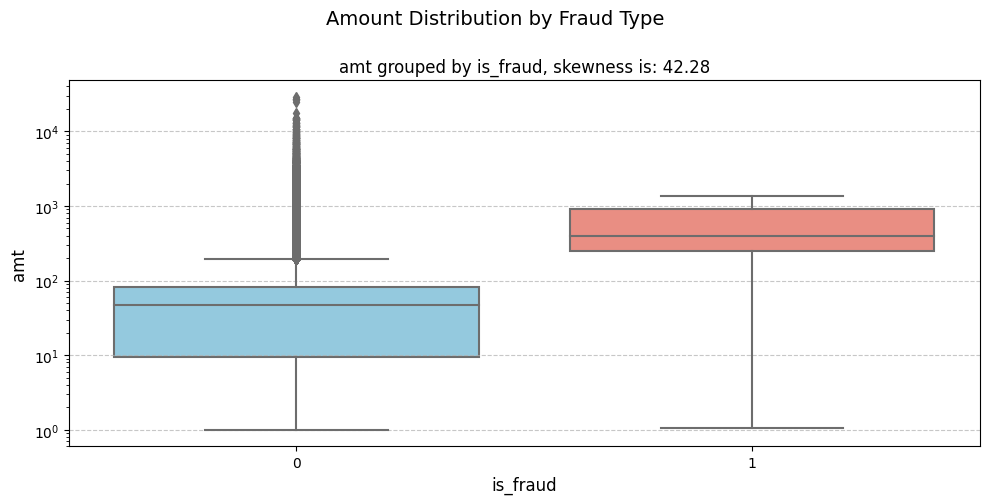


📊 Statistics for 'amt' by 'is_fraud':

🔹 Group: 0
  Count: 1289169
  Min: 1.00
  25th Percentile: 9.61
  Median: 47.28
  75th Percentile: 82.54
  Max: 28948.90
  Mean: 67.67
  Mode: 1.14
  Std Dev: 154.01

🔹 Group: 1
  Count: 7506
  Min: 1.06
  25th Percentile: 245.66
  Median: 396.50
  75th Percentile: 900.88
  Max: 1376.04
  Mean: 531.32
  Mode: 8.75
  Std Dev: 390.56



In [41]:
boxplot_by_group(
    dataset=df,
    feature='amt',
    group_by='is_fraud',
    title='Amount Distribution by Fraud Type',
    palette={0: 'skyblue', 1: 'salmon'},
    log_scale=True
)

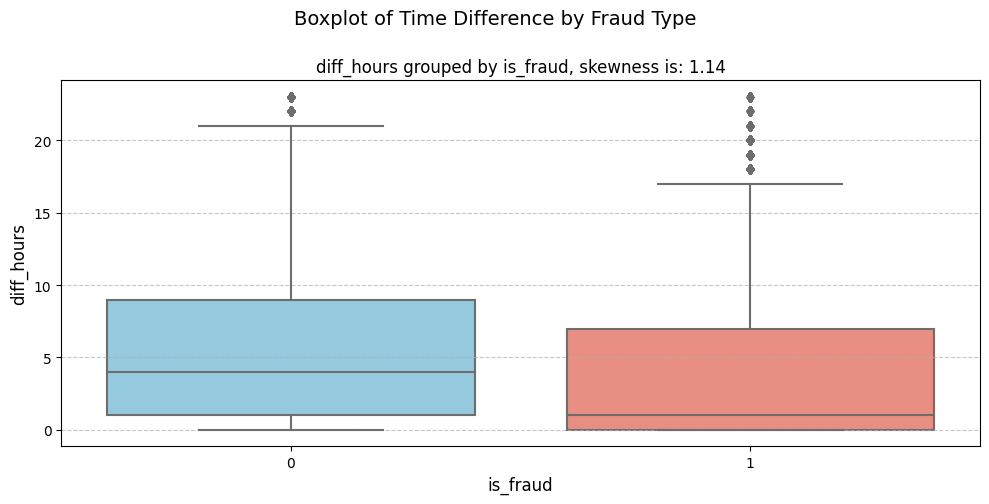


📊 Statistics for 'diff_hours' by 'is_fraud':

🔹 Group: 0
  Count: 1288261
  Min: 0.00
  25th Percentile: 1.00
  Median: 4.00
  75th Percentile: 9.00
  Max: 23.00
  Mean: 5.75
  Mode: 0.00
  Std Dev: 5.88

🔹 Group: 1
  Count: 7431
  Min: 0.00
  25th Percentile: 0.00
  Median: 1.00
  75th Percentile: 7.00
  Max: 23.00
  Mean: 4.48
  Mode: 0.00
  Std Dev: 6.63



In [42]:
boxplot_by_group(
    dataset=df,
    feature='diff_hours',
    group_by='is_fraud',
    title='Boxplot of Time Difference by Fraud Type',
    palette={0: 'skyblue', 1: 'salmon'},
    log_scale=False
)

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



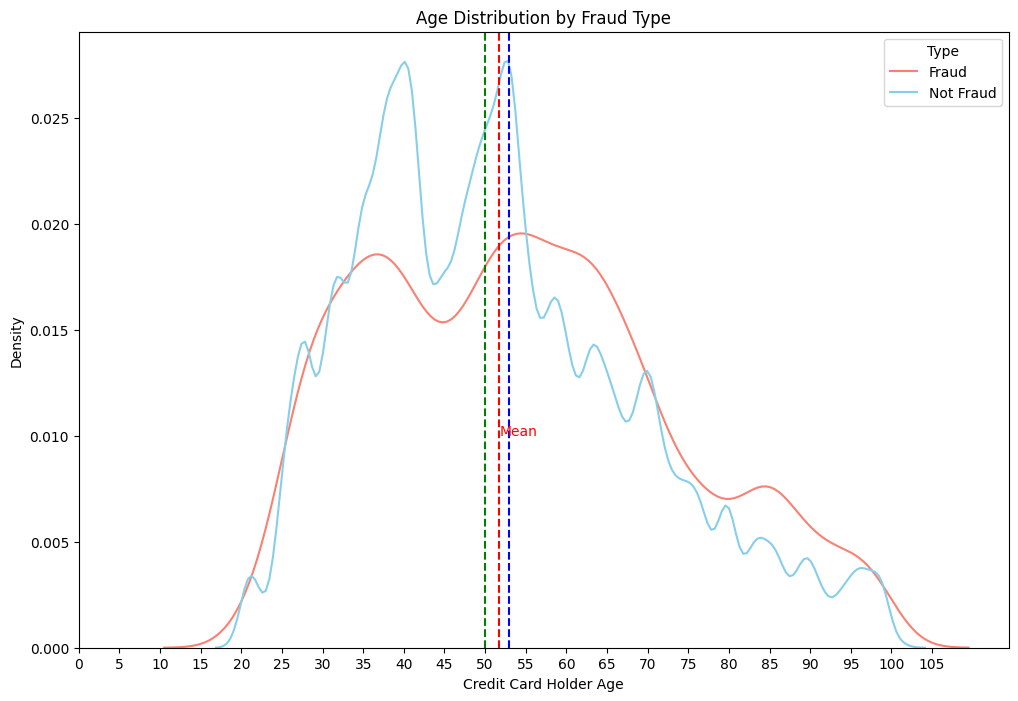

In [43]:
## Check skewness of Age
plt.figure(figsize=(12, 8))
ax = sns.kdeplot(x='age', data=df, hue='is_fraud', common_norm=False, palette={0:'skyblue', 1:'salmon'})
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,110,5))
plt.title('Age Distribution by Fraud Type')
plt.axvline(df['age'].mean(), color='red', linestyle='--', label='Mean Age')
plt.axvline(df['age'].median(), color='green', linestyle='--', label='Median Age')
plt.axvline(df['age'].mode()[0], color='blue', linestyle='--', label='Mode Age')
plt.text(df['age'].mean(), 0.01, 'Mean', color='red')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



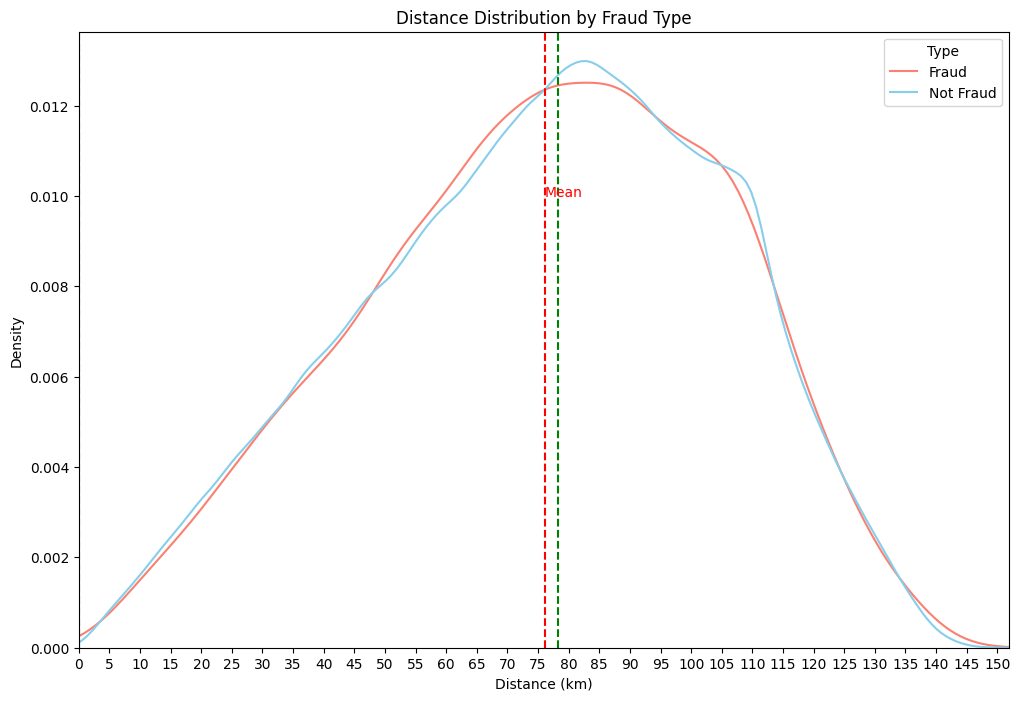

In [37]:
## Check skewness of Distance
plt.figure(figsize=(12, 8))
ax = sns.kdeplot(x='distance', data=df, hue='is_fraud', common_norm=False, palette={0:'skyblue', 1:'salmon'})
ax.set_xlabel('Distance (km)')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,200,5))
plt.title('Distance Distribution by Fraud Type')
plt.axvline(df['distance'].mean(), color='red', linestyle='--', label='Mean Distance')
plt.axvline(df['distance'].median(), color='green', linestyle='--', label='Median Distance')
plt.axvline(df['distance'].mode()[0], color='blue', linestyle='--', label='Mode Distance')
plt.xlim(0, df['distance'].max())
plt.text(df['distance'].mean(), 0.01, 'Mean', color='red')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.show()

### Date/Time Features

Text(0.5, 1.0, 'Count of is_fraud by weekend')

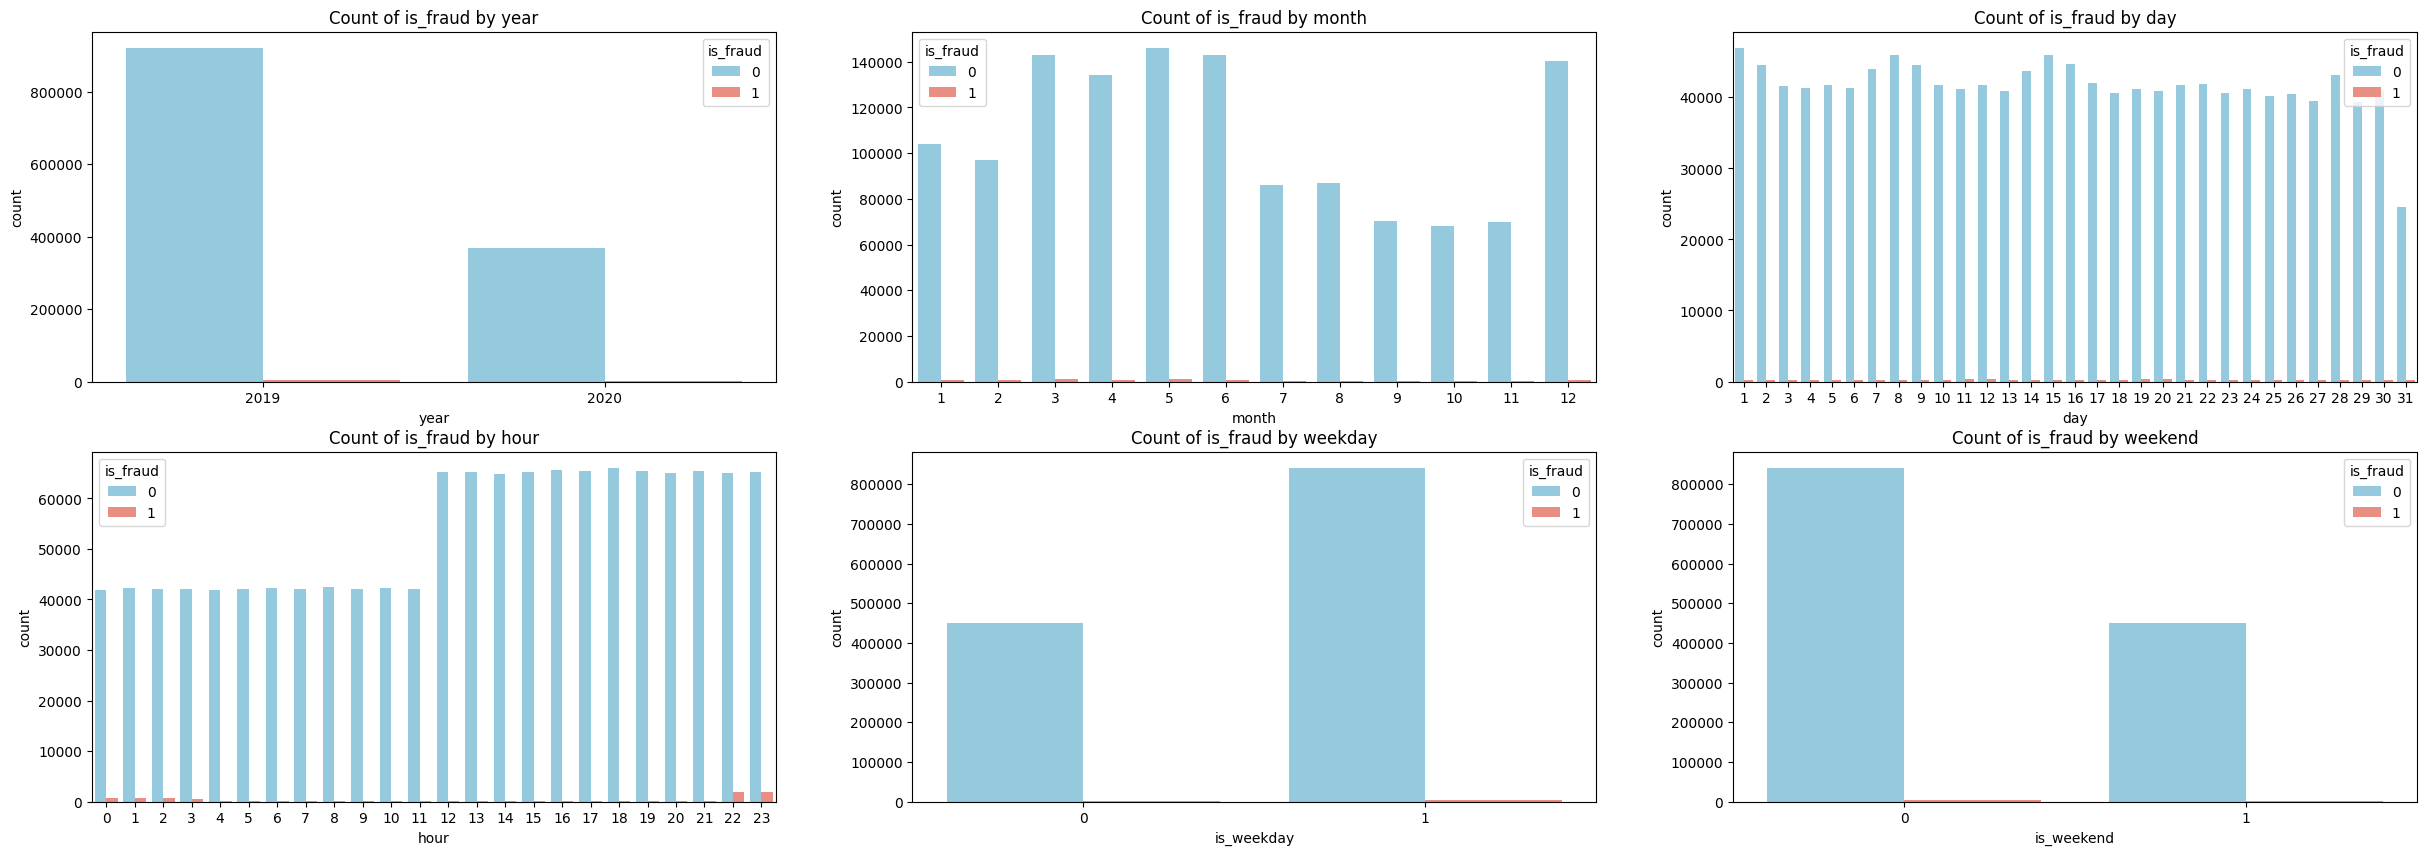

In [44]:
## The distribution of date/time features simple bar plot when is_fraud = 0 and is_fraud = 1
def get_count_df(column):
    return df.groupby([column, 'is_fraud']).size().reset_index(name='count')

fig, ax = plt.subplots(2, 3, figsize=(30, 10))

# year
year_df = get_count_df('year')
sns.barplot(x='year', y='count', hue='is_fraud', data=year_df, palette={0: 'skyblue', 1: 'salmon'}, ax=ax[0, 0])
ax[0, 0].set_title('Count of is_fraud by year')

# month
month_df = get_count_df('month')
sns.barplot(x='month', y='count', hue='is_fraud', data=month_df, palette={0: 'skyblue', 1: 'salmon'}, ax=ax[0, 1])
ax[0, 1].set_title('Count of is_fraud by month')

# day
day_df = get_count_df('day')
sns.barplot(x='day', y='count', hue='is_fraud', data=day_df, palette={0: 'skyblue', 1: 'salmon'}, ax=ax[0, 2])
ax[0, 2].set_title('Count of is_fraud by day')

# hour
hour_df = get_count_df('hour')
sns.barplot(x='hour', y='count', hue='is_fraud', data=hour_df, palette={0: 'skyblue', 1: 'salmon'}, ax=ax[1, 0])
ax[1, 0].set_title('Count of is_fraud by hour')

# is_weekday
weekday_df = get_count_df('is_weekday')
sns.barplot(x='is_weekday', y='count', hue='is_fraud', data=weekday_df, palette={0: 'skyblue', 1: 'salmon'}, ax=ax[1, 1])
ax[1, 1].set_title('Count of is_fraud by weekday')

# is_weekend
weekend_df = get_count_df('is_weekend')
sns.barplot(x='is_weekend', y='count', hue='is_fraud', data=weekend_df, palette={0: 'skyblue', 1: 'salmon'}, ax=ax[1, 2])
ax[1, 2].set_title('Count of is_fraud by weekend')

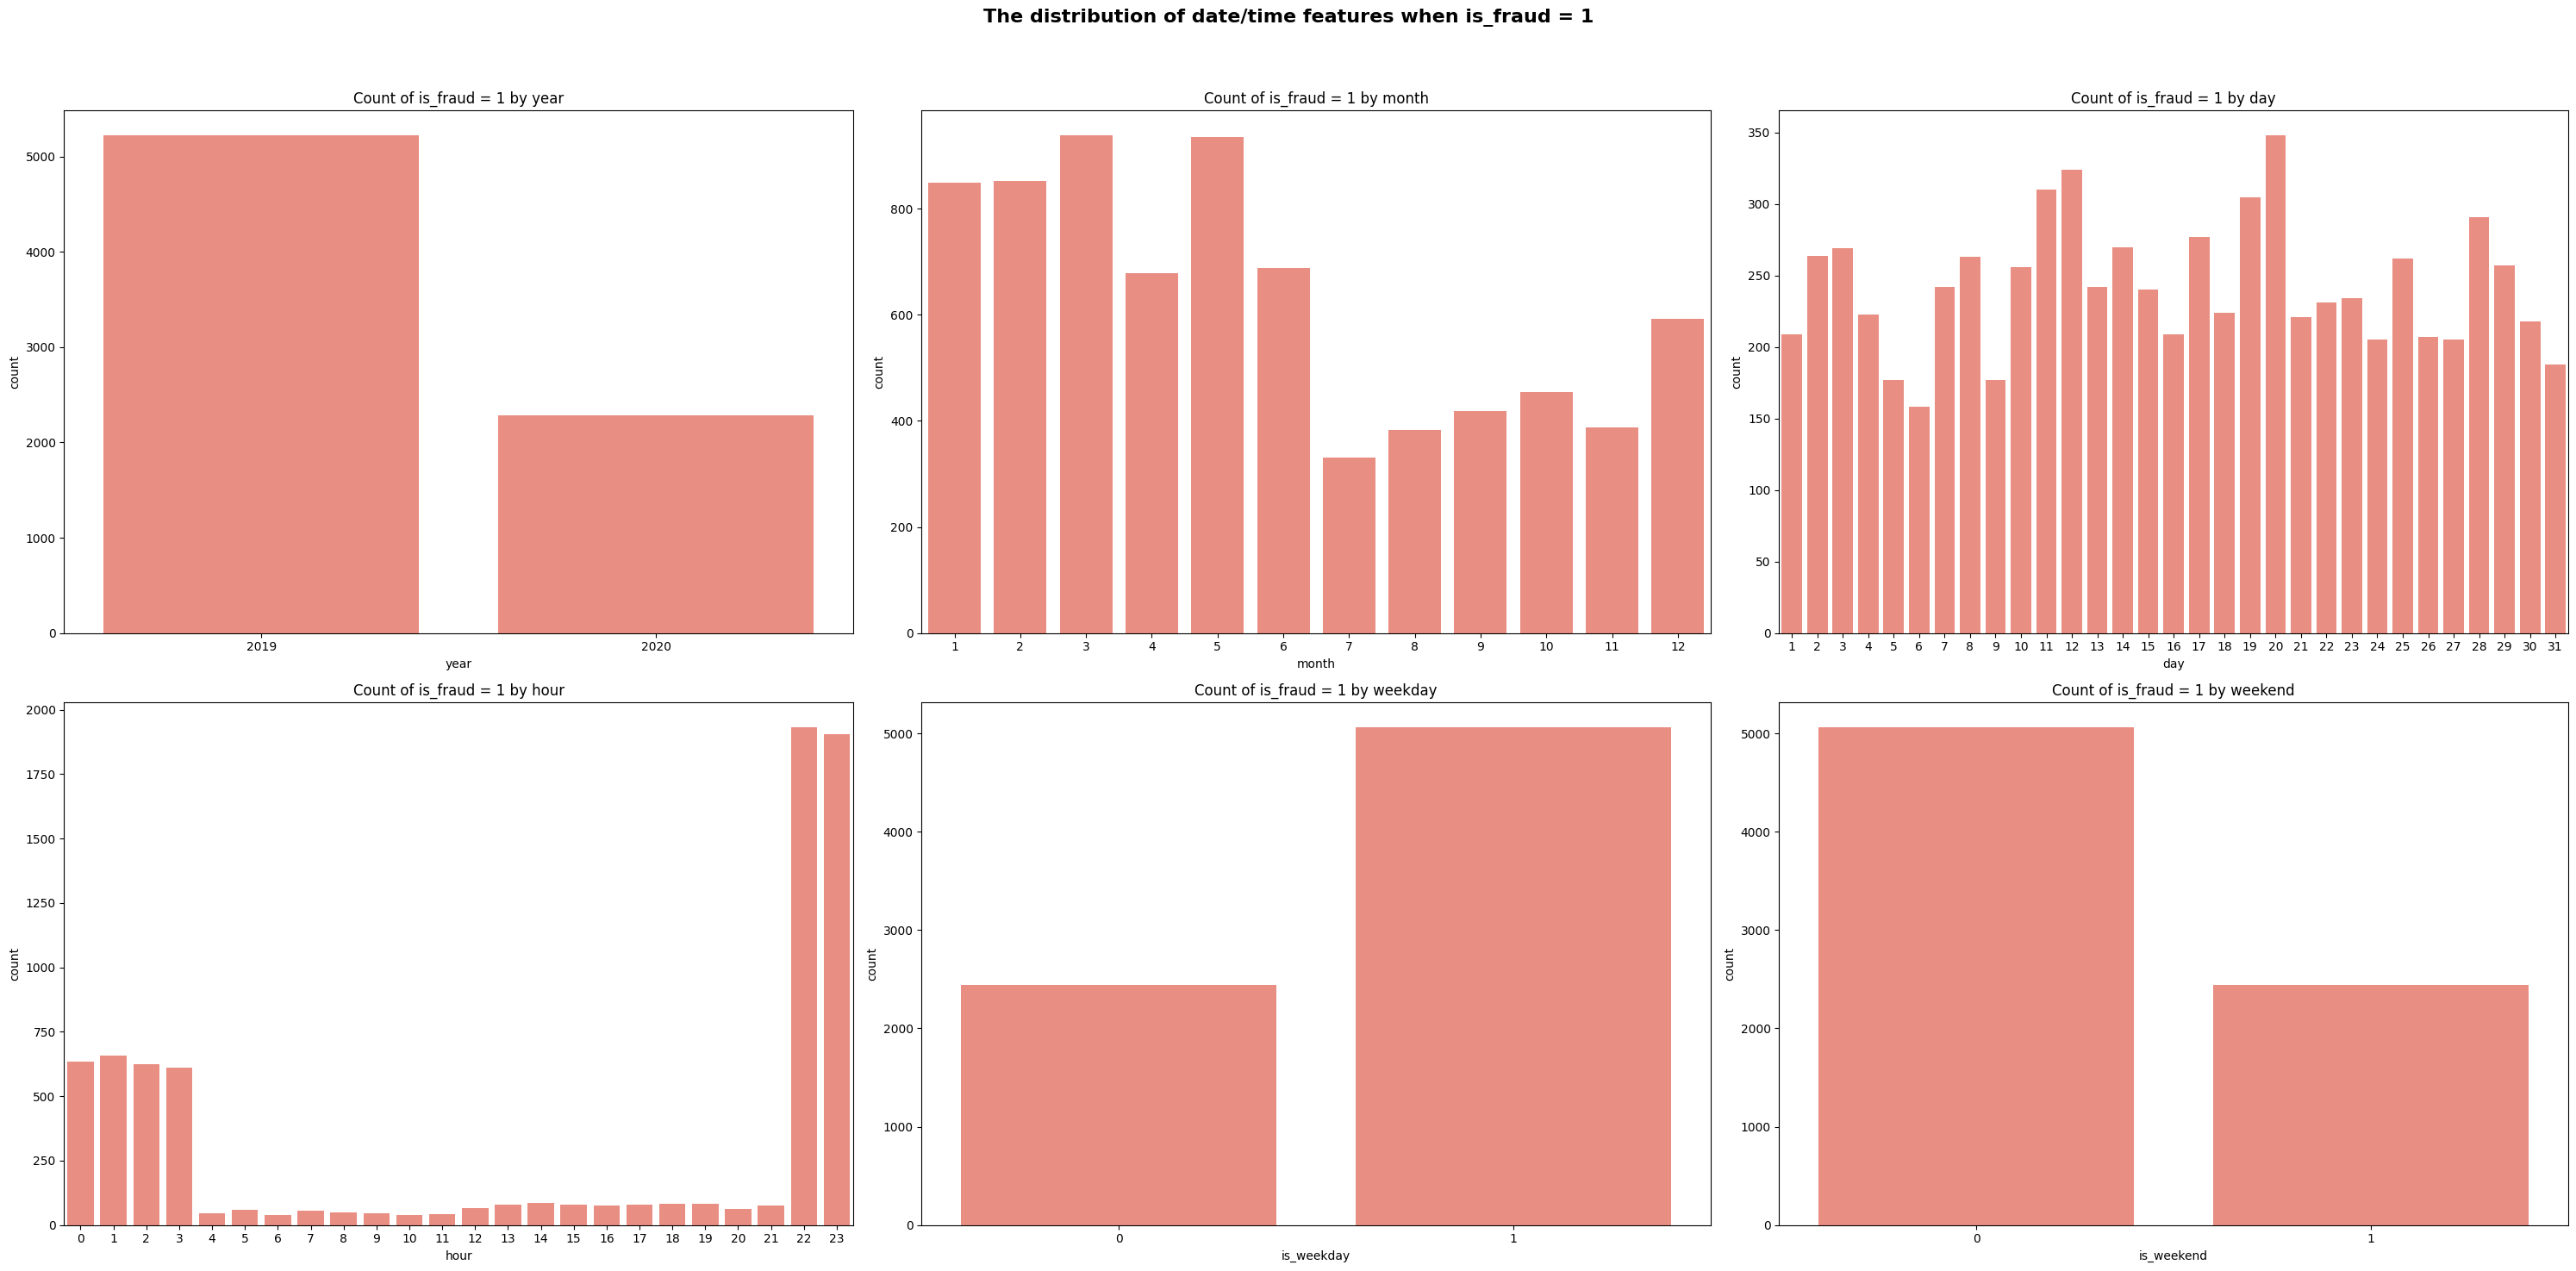

In [50]:
## The distribution of date/time features when is_fraud = 1
def get_count_df(column):
    # Get grouped count only for is_fraud = 1
    return df[df['is_fraud'] == 1].groupby([column, 'is_fraud']).size().reset_index(name='count')

fig, ax = plt.subplots(2, 3, figsize=(30, 15))

# Define a helper to plot one
def plot_single_bar(ax, column, title):
    temp_df = get_count_df(column)
    sns.barplot(x=column, y='count', data=temp_df, color='salmon', ax=ax)
    ax.set_title(f"Count of is_fraud = 1 by {title}")
    ax.set_ylabel('count')
    ax.set_xlabel(column)

# Create plots
plot_single_bar(ax[0, 0], 'year', 'year')
plot_single_bar(ax[0, 1], 'month', 'month')
plot_single_bar(ax[0, 2], 'day', 'day')
plot_single_bar(ax[1, 0], 'hour', 'hour')
plot_single_bar(ax[1, 1], 'is_weekday', 'weekday')
plot_single_bar(ax[1, 2], 'is_weekend', 'weekend')

plt.suptitle("The distribution of date/time features when is_fraud = 1", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

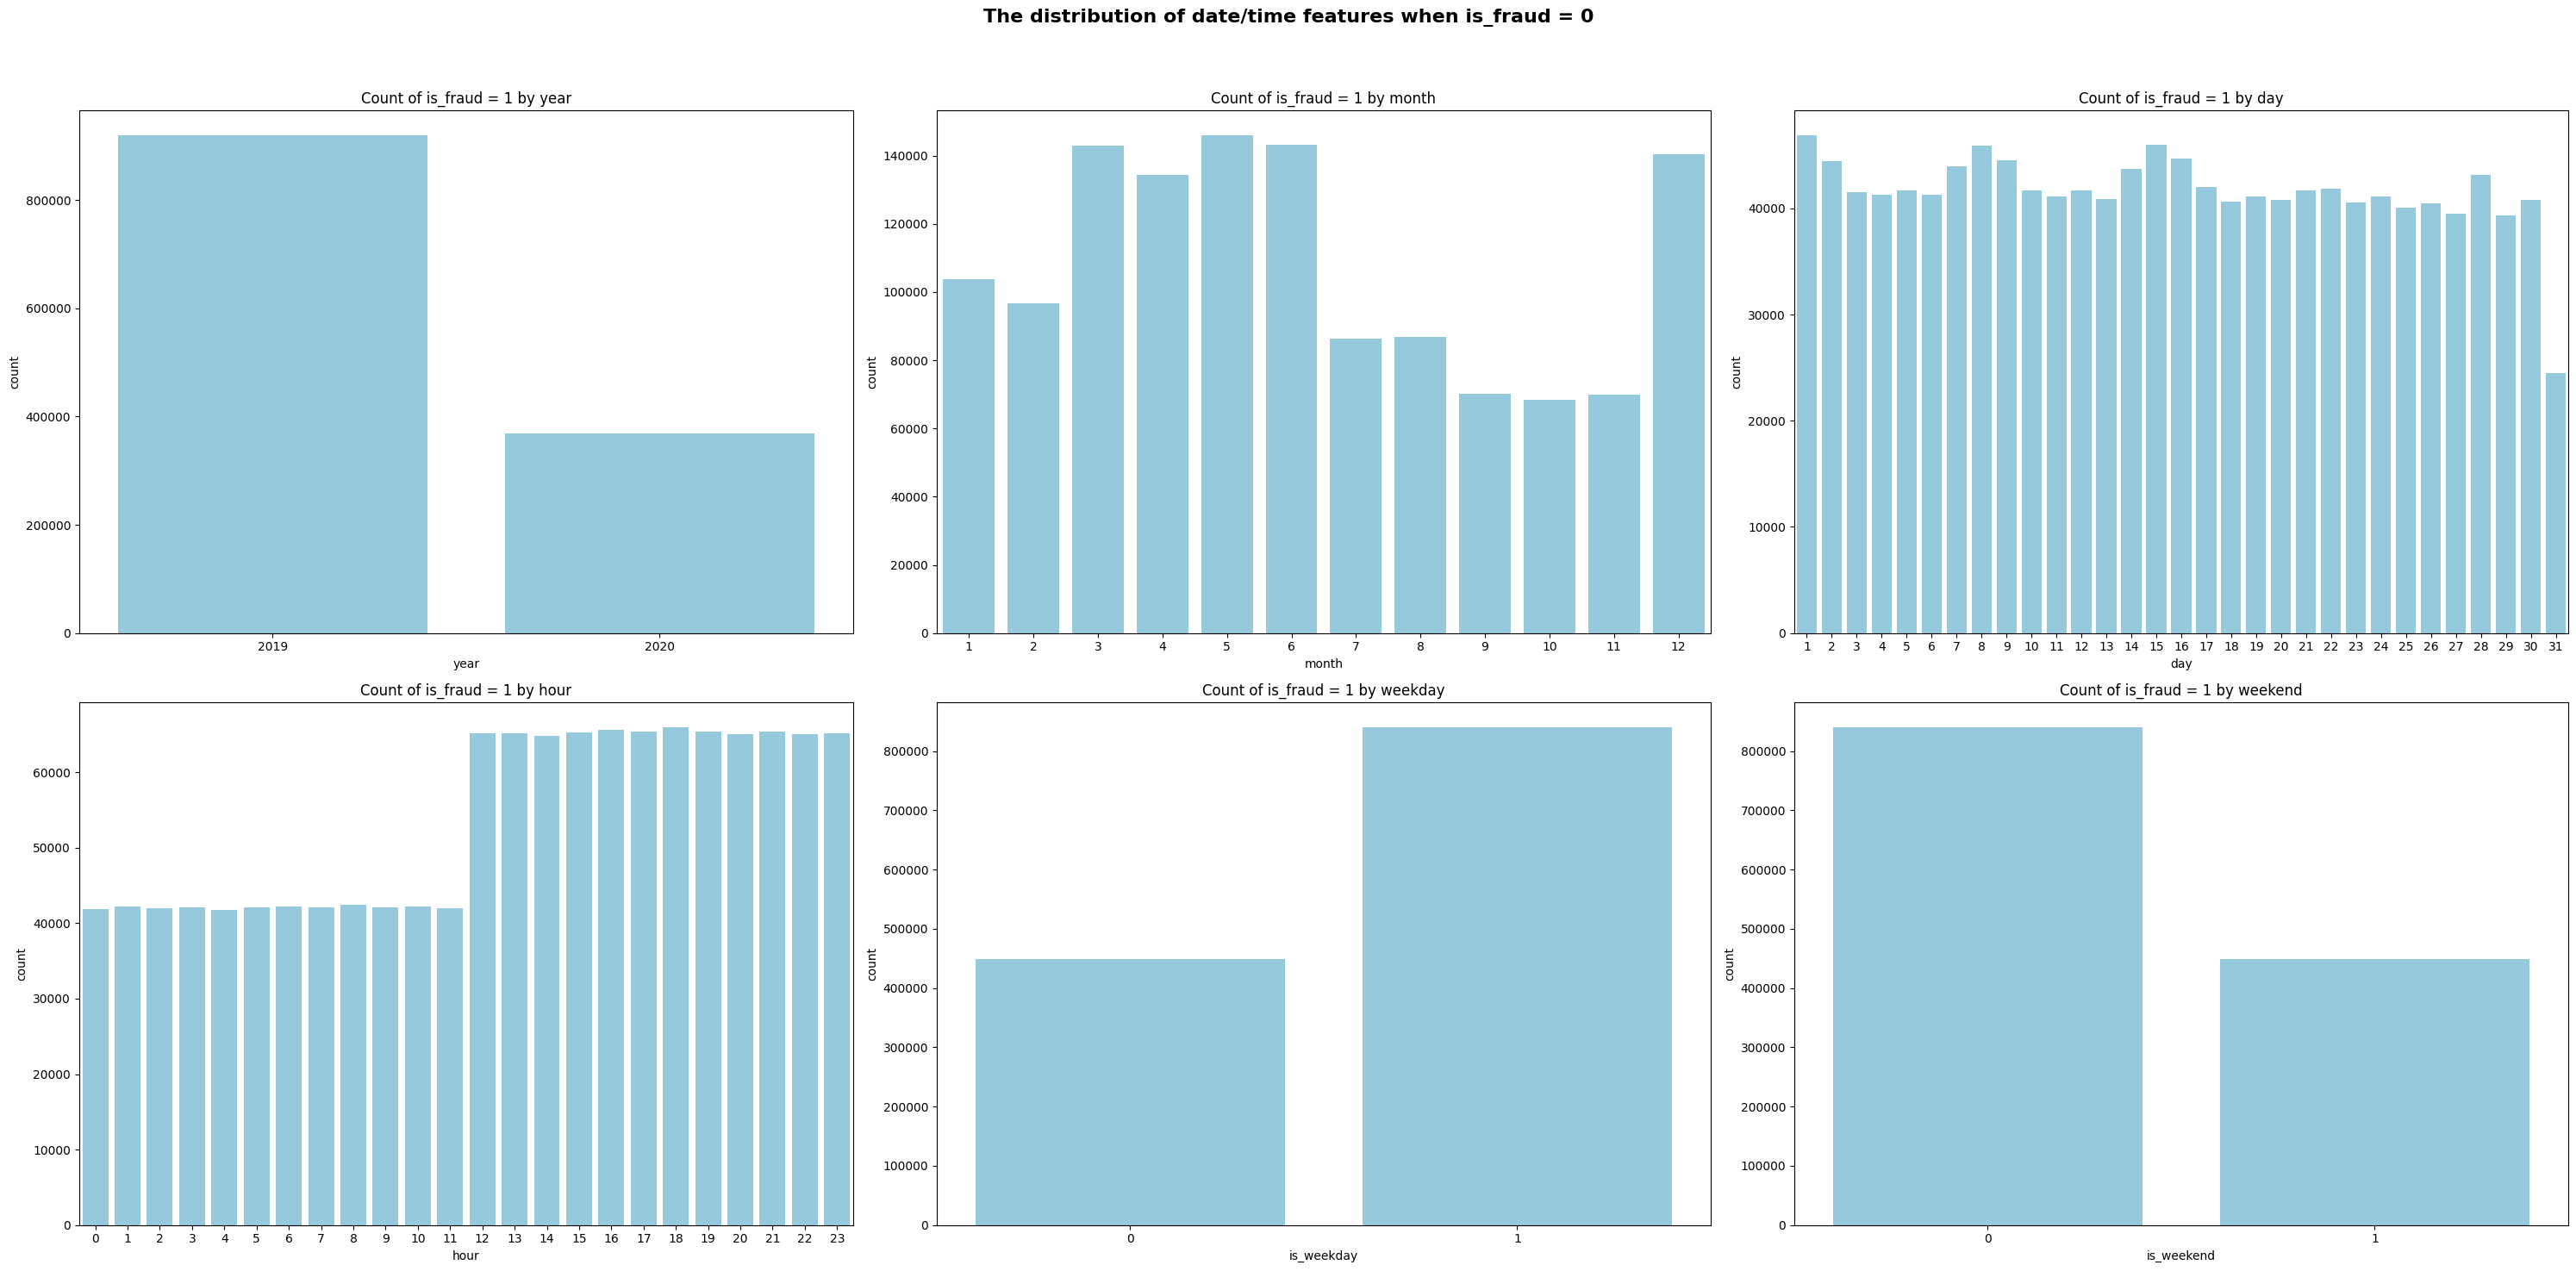

In [51]:
## The distribution of date/time features when is_fraud = 0
def get_count_df(column):
    # Get grouped count only for is_fraud = 0
    return df[df['is_fraud'] == 0].groupby([column, 'is_fraud']).size().reset_index(name='count')

fig, ax = plt.subplots(2, 3, figsize=(30, 15))

# Define a helper to plot one
def plot_single_bar(ax, column, title):
    temp_df = get_count_df(column)
    sns.barplot(x=column, y='count', data=temp_df, color='skyblue', ax=ax)
    ax.set_title(f"Count of is_fraud = 1 by {title}")
    ax.set_ylabel('count')
    ax.set_xlabel(column)

# Create plots
plot_single_bar(ax[0, 0], 'year', 'year')
plot_single_bar(ax[0, 1], 'month', 'month')
plot_single_bar(ax[0, 2], 'day', 'day')
plot_single_bar(ax[1, 0], 'hour', 'hour')
plot_single_bar(ax[1, 1], 'is_weekday', 'weekday')
plot_single_bar(ax[1, 2], 'is_weekend', 'weekend')

plt.suptitle("The distribution of date/time features when is_fraud = 0", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

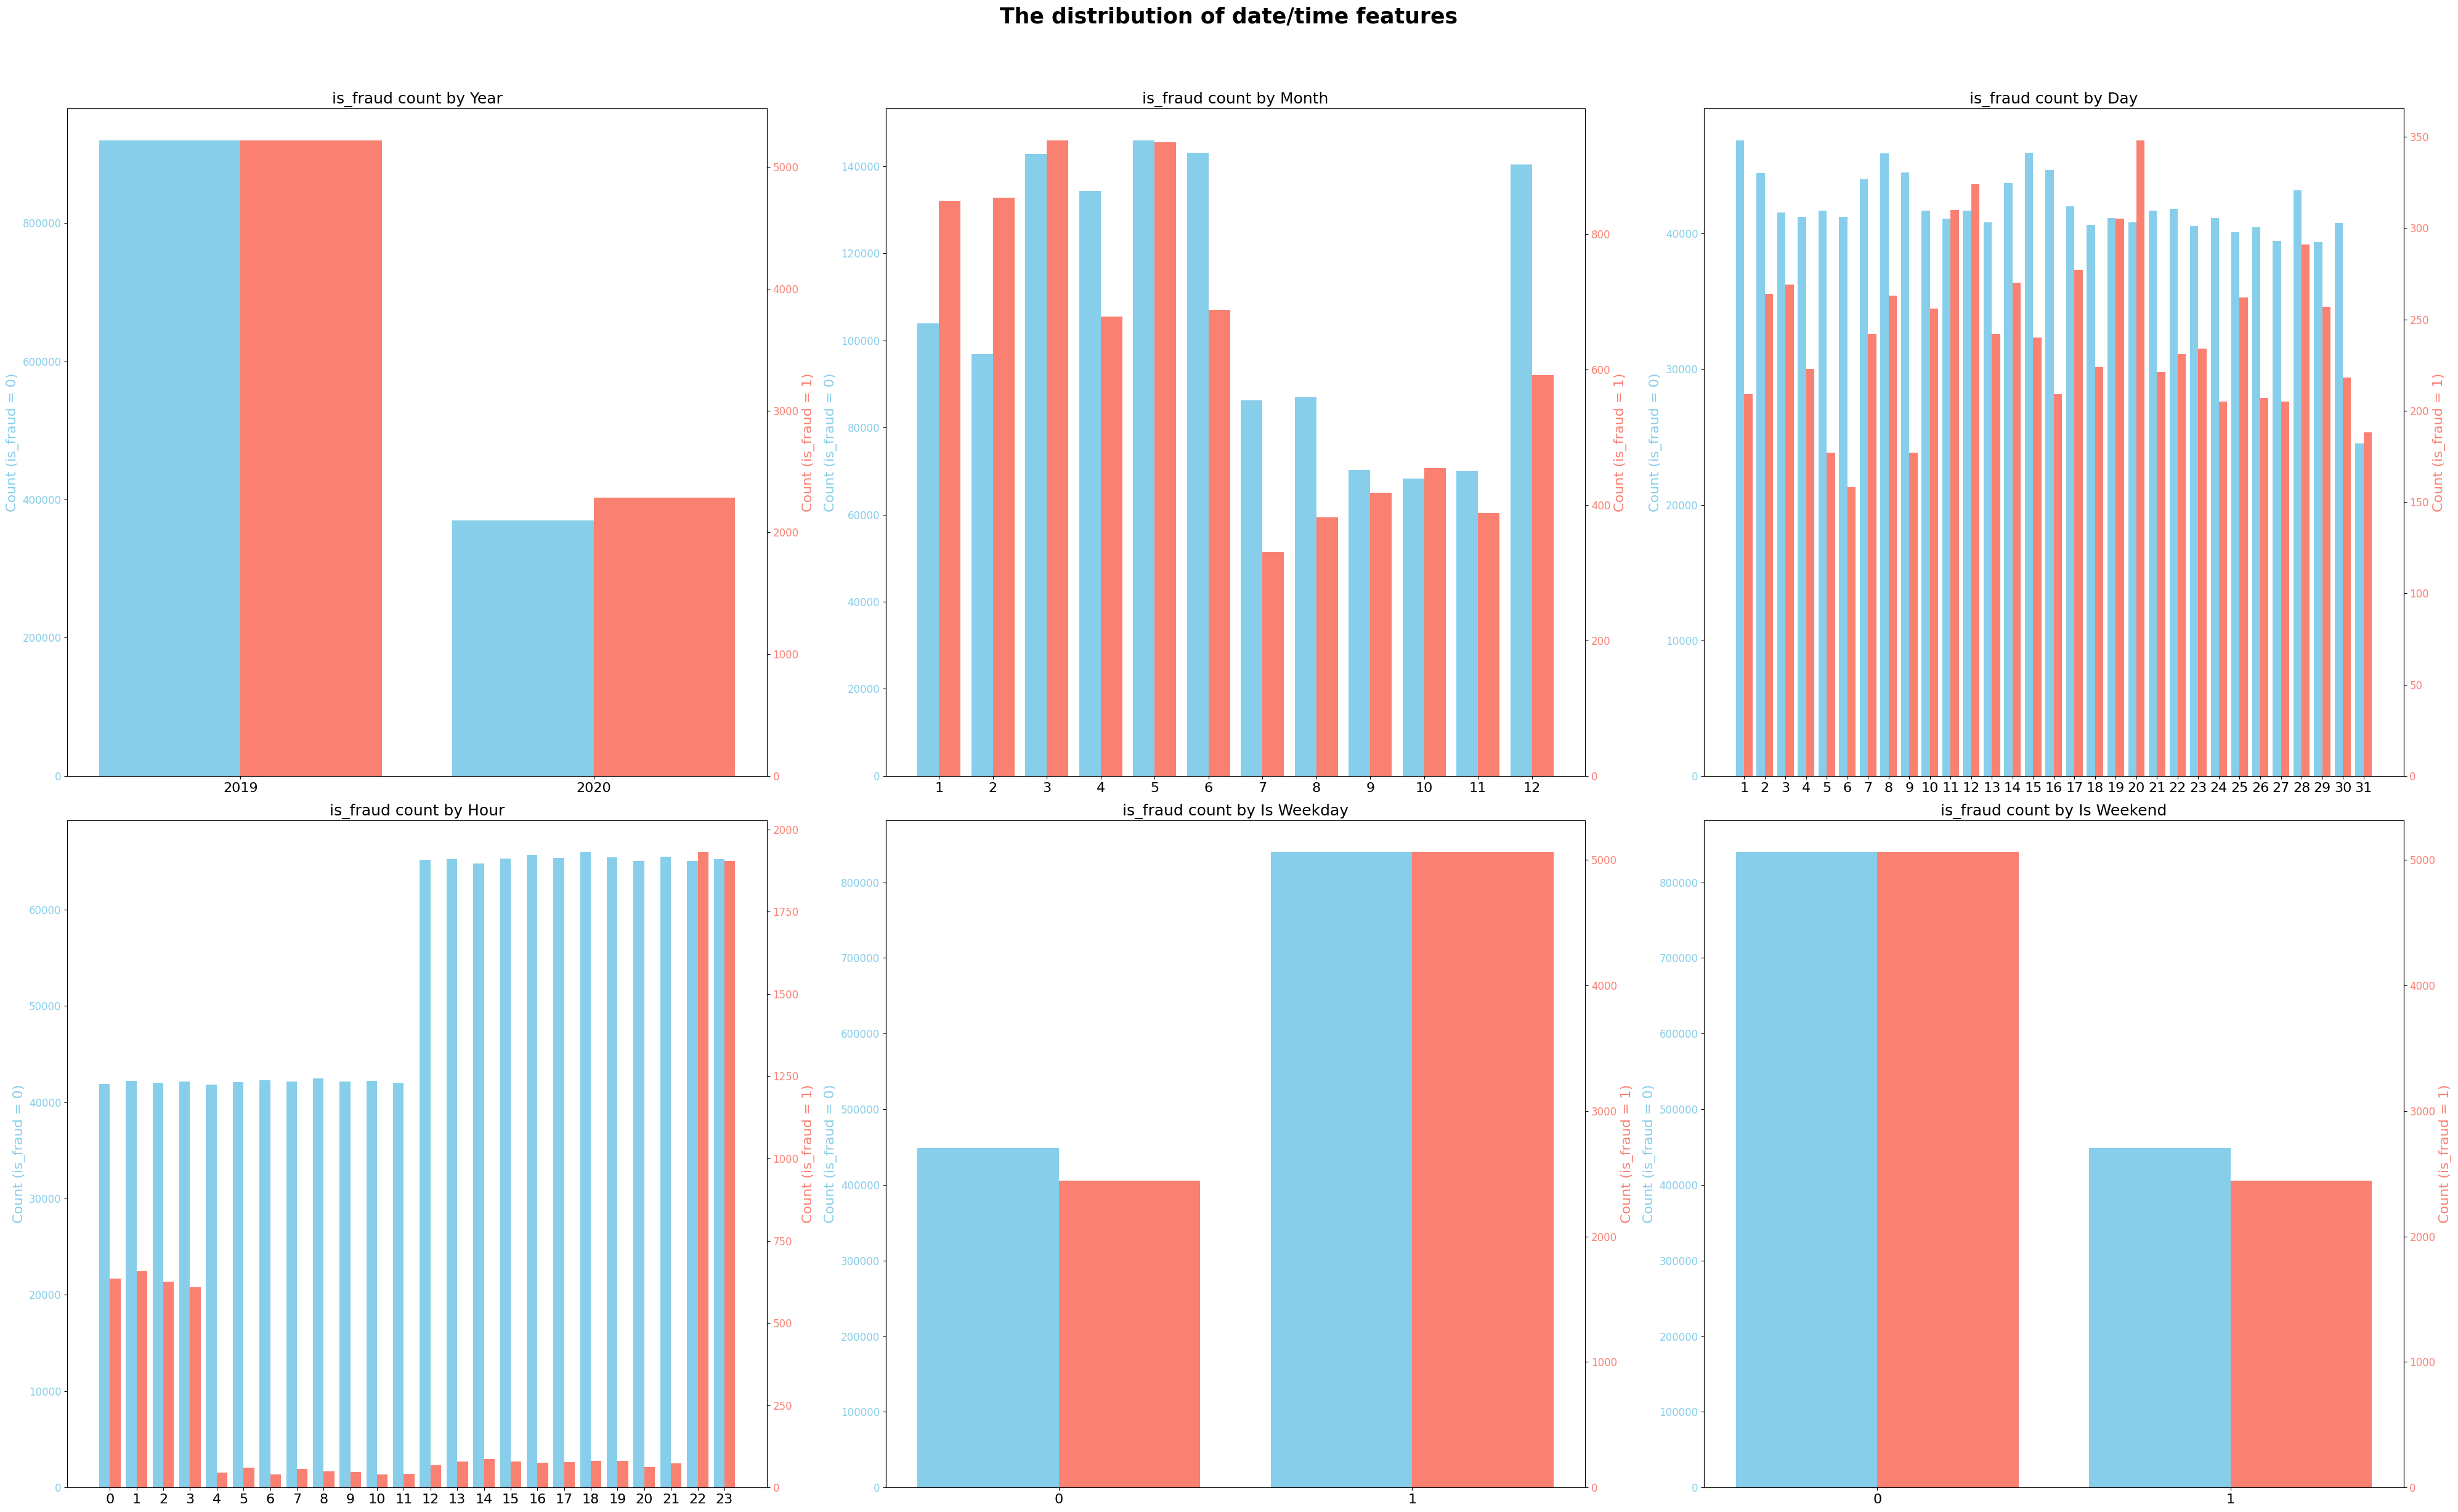

In [54]:
## The distribution of date/time features (dual-axis) when is_fraud = 0 and is_fraud = 1
fig, ax = plt.subplots(2, 3, figsize=(40, 25))

# Color map for is_fraud
colors = {0: 'skyblue', 1: 'salmon'}

# List of features to plot
features = ['year', 'month', 'day', 'hour', 'is_weekday', 'is_weekend']
titles = ['Year', 'Month', 'Day', 'Hour', 'Is Weekday', 'Is Weekend']

for i, feature in enumerate(features):
    row, col = i // 3, i % 3

    # Prepare counts for both classes
    count_0 = df[df['is_fraud'] == 0][feature].value_counts().sort_index()
    count_1 = df[df['is_fraud'] == 1][feature].value_counts().sort_index()

    # Align index to ensure same order
    all_indexes = sorted(set(count_0.index).union(set(count_1.index)))
    count_0 = count_0.reindex(all_indexes, fill_value=0)
    count_1 = count_1.reindex(all_indexes, fill_value=0)

    x = range(len(all_indexes))
    labels = all_indexes

    # Primary axis (left) - is_fraud = 0
    ax1 = ax[row, col]
    ax1.bar(x, count_0.values, color=colors[0], width=0.4, align='center', label='is_fraud = 0')
    ax1.set_ylabel('Count (is_fraud = 0)', color=colors[0], fontsize=16)
    ax1.tick_params(axis='y', labelcolor=colors[0], labelsize=12)

    # Secondary axis (right) - is_fraud = 1
    ax2 = ax1.twinx()
    ax2.bar([i + 0.4 for i in x], count_1.values, color=colors[1], width=0.4, align='center', label='is_fraud = 1')
    ax2.set_ylabel('Count (is_fraud = 1)', color=colors[1], fontsize=16)
    ax2.tick_params(axis='y', labelcolor=colors[1], labelsize=12)

    # X-axis labels
    ax1.set_xticks([i + 0.2 for i in x])
    ax1.set_xticklabels(labels, fontsize=12)
    ax1.set_title(f'is_fraud count by {titles[i]}', fontsize=18)
    ax1.tick_params(axis='x', labelsize=16)

plt.suptitle("The distribution of date/time features", fontsize=25, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Correlation

In [55]:
# Exclude non-numeric columns and other irrelevant features
excluded_columns = ['Unnamed: 0', 'cc_num', 'trans_num', 'first', 'last', 'street', 'time_diff', 'trans_date_trans_time', 'dob']
df_numeric = df.drop(columns=excluded_columns).select_dtypes(include=['number'])


# Calculate correlation matrix for numeric features
correlation_matrix = df_numeric.corr()
correlation_matrix_fraud = df_numeric.corrwith(df['is_fraud']).abs().sort_values(ascending=False)

# Display the correlation matrix
display(correlation_matrix)

,merchant,amt,gender,city,state,zip,lat,long,city_pop,job,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,distance
merchant,1.000000,-0.002633,-0.000915,-0.000294,-0.000424,0.001113,-0.002266,-0.000697,0.001911,0.001360,...,-0.019710,-4.684129e-03,0.019241,-0.014949,0.047034,0.014335,0.012341,-0.003201,-0.005488,2.952109e-04
amt,-0.002633,1.000000,0.001034,-0.000565,0.001718,0.001843,-0.001926,-0.000187,0.005818,-0.000628,...,-0.026860,-2.440761e-02,-0.024701,0.014856,-0.011905,-0.038303,0.032153,0.018492,0.046097,-1.086256e-03
gender,-0.000915,0.001034,1.000000,0.016039,-0.031794,-0.065951,0.042935,0.050404,-0.028649,-0.079908,...,0.011030,1.120602e-02,-0.005471,-0.007138,0.007930,-0.033654,-0.011368,-0.021437,0.018289,-2.344608e-03
city,-0.000294,-0.000565,0.016039,1.000000,-0.043064,0.074757,-0.032044,-0.066703,0.034923,0.020446,...,0.000245,-2.506131e-03,0.000336,0.000568,0.000062,0.000863,0.000484,0.000869,0.000496,3.112417e-03
state,-0.000424,0.001718,-0.031794,-0.043064,1.000000,-0.116264,0.213270,0.132465,-0.012197,0.042915,...,-0.000450,1.788287e-03,0.001576,-0.002025,0.000589,-0.002116,0.003312,-0.001008,-0.002495,-1.559016e-02
zip,0.001113,0.001843,-0.065951,0.074757,-0.116264,1.000000,-0.114290,-0.909732,0.078467,-0.005678,...,0.001971,-2.778738e-04,0.000043,0.003606,-0.005800,0.002696,0.005773,0.000691,-0.004397,6.032324e-03
lat,-0.002266,-0.001926,0.042935,-0.032044,0.213270,-0.114290,1.000000,-0.015533,-0.155730,-0.027593,...,0.004764,-2.498143e-03,-0.001151,0.003778,-0.003213,-0.002519,-0.001216,-0.009322,0.003001,-7.135691e-02
long,-0.000697,-0.000187,0.050404,-0.066703,0.132465,-0.909732,-0.015533,1.000000,-0.052715,-0.002729,...,-0.002698,1.625475e-04,-0.000322,-0.003693,0.006269,-0.001948,-0.004617,0.000912,0.003055,4.040554e-03
city_pop,0.001911,0.005818,-0.028649,0.034923,-0.012197,0.078467,-0.155730,-0.052715,1.000000,-0.054945,...,-0.003465,-2.624203e-03,-0.000917,-0.002028,0.004502,0.000405,0.003565,0.011691,-0.002169,1.070534e-02
job,0.001360,-0.000628,-0.079908,0.020446,0.042915,-0.005678,-0.027593,-0.002729,-0.054945,1.000000,...,-0.001635,-1.805403e-03,-0.000620,0.000283,0.001652,0.002558,-0.000596,0.005071,-0.002180,2.115781e-03


In [43]:
# # Exclude datetime and target feature
# excluded_columns = ['Unnamed: 0', 'cc_num', 'trans_num', 'first', 'last', 'street', 'time_diff', 'trans_date_trans_time', 'dob']
# correlation_matrix = df.drop(columns=excluded_columns).corr()
# correlation_matrix_fraud = df.corr(numeric_only=True)['is_fraud'].drop('is_fraud').abs().sort_values(ascending=False)

# # Display the correlation matrix
# display(correlation_matrix)

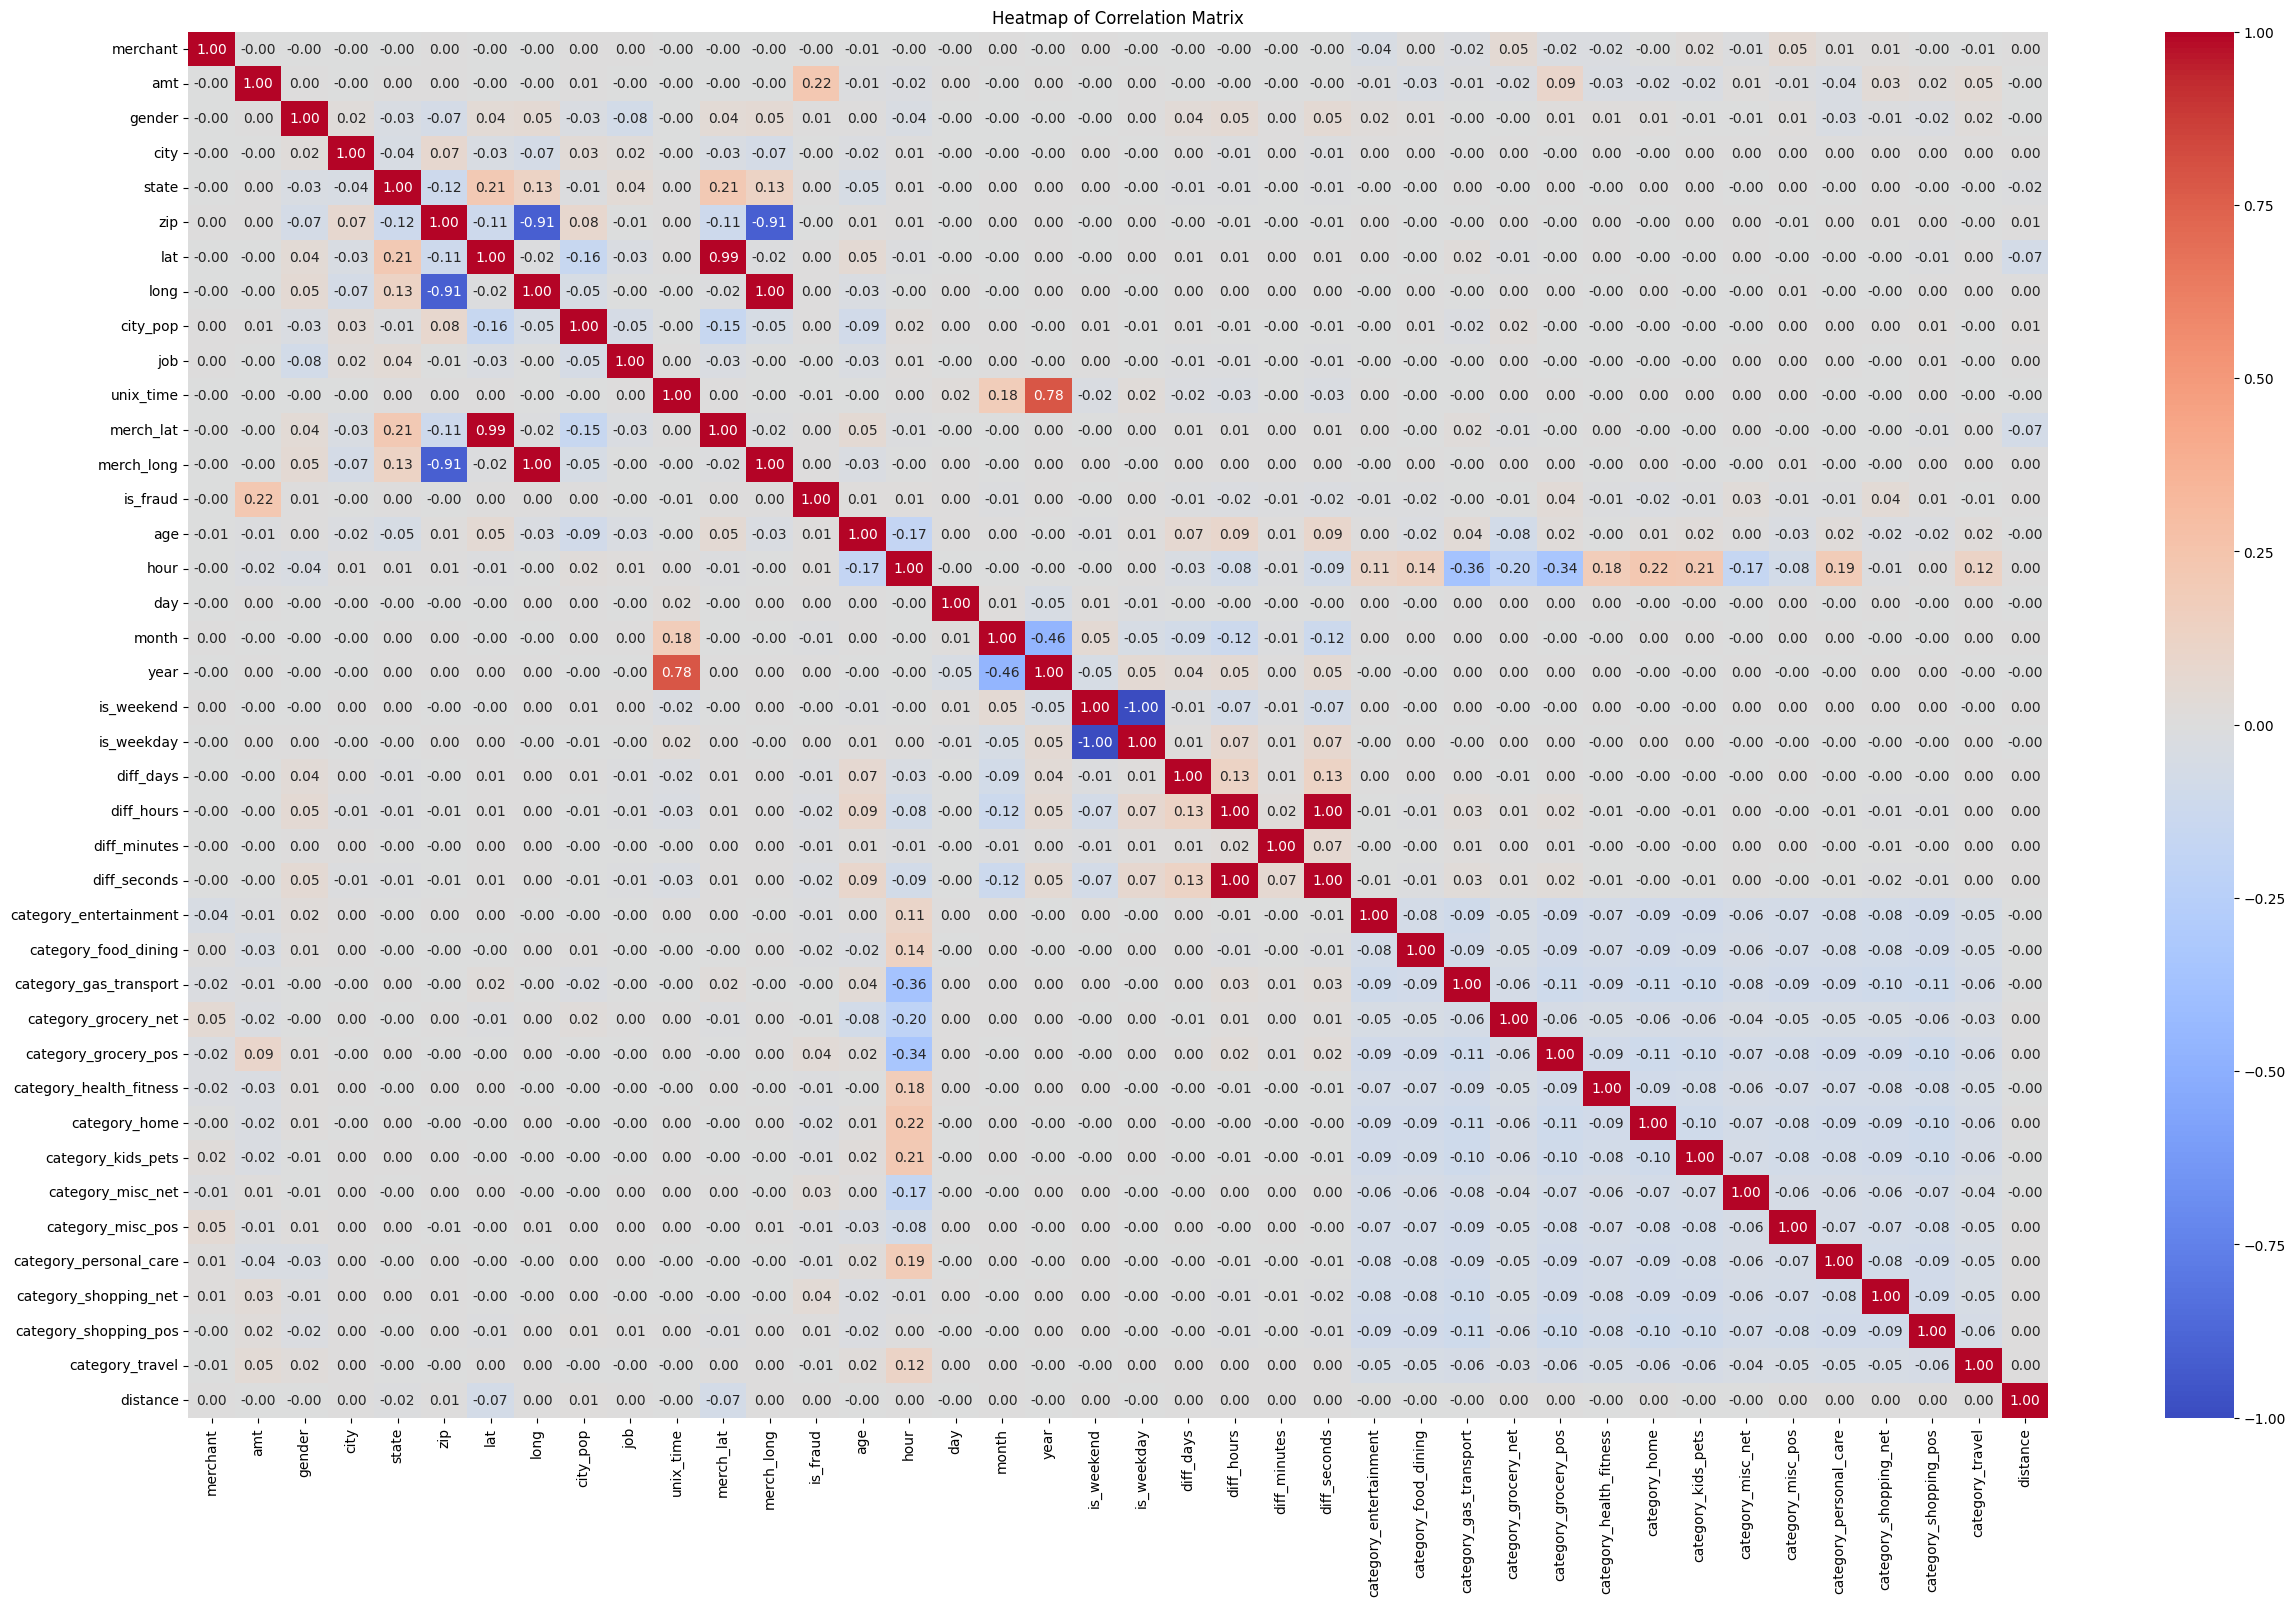

In [56]:
# Plot the heatmap for all features
plt.figure(figsize=(30, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Heatmap of Correlation Matrix")
plt.show()